In [36]:
import numpy as np
import matplotlib.pyplot as plt

Define needed functions and their derivatives

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return (y_pred - y_true)

Initialize training data

In [38]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([[0], [1], [1], [0]])

Initialize random weights and train network

In [39]:
np.random.seed(42)

input_size = 2
hidden_size = 5
output_size = 1

weights_1 = 0.1 * np.random.randn(input_size, hidden_size)
biases_1 = np.zeros((1, hidden_size))
weights_2 = 0.1 * np.random.randn(hidden_size, output_size)
biases_2 = np.zeros((1, output_size))

learning_rate = 1.5
epochs = 5000
losses = []

for epoch_idx in range(epochs):
    z_1 = X @ weights_1 + biases_1
    a_1 = sigmoid(z_1)
    z_2 = a_1 @ weights_2 + biases_2
    a_2 = sigmoid(z_2)

    loss_val = mse(Y, a_2)
    losses.append(loss_val)

    if epoch_idx % 1000 == 0:
        print(f"Epoch {epoch_idx}, Loss: {loss_val:.5f}")

    dz_2 = mse_derivative(Y, a_2) * sigmoid_derivative(z_2)
    dW_2 = a_1.T @ dz_2
    db_2 = np.sum(dz_2, axis=0, keepdims=True)

    dz_1 = dz_2 @ weights_2.T * sigmoid_derivative(z_1)
    dW_1 = X.T @ dz_1
    db_1 = np.sum(dz_1, axis=0, keepdims=True)

    weights_2 -= learning_rate * dW_2
    biases_2 -= learning_rate * db_2
    weights_1 -= learning_rate * dW_1
    biases_1 -= learning_rate * db_1

Epoch 0, Loss: 0.25300
Epoch 1000, Loss: 0.25000
Epoch 2000, Loss: 0.24999
Epoch 3000, Loss: 0.02343
Epoch 4000, Loss: 0.00095


Evaluate network


Final outputs after training:
[[0.]
 [1.]
 [1.]
 [0.]]


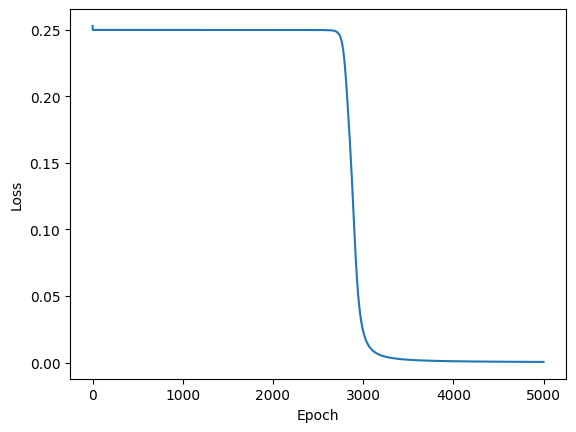

(5, 1)


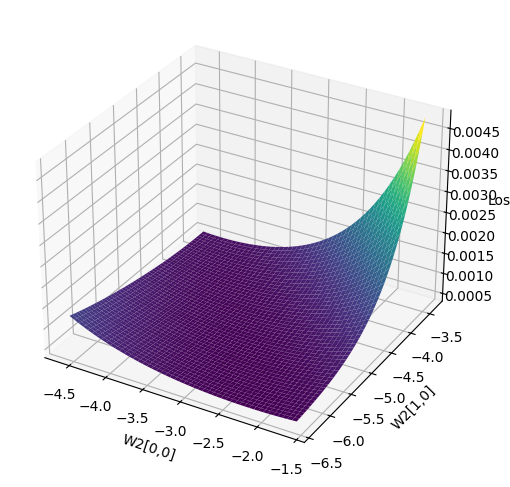

In [ ]:
print("\nFinal outputs after training:")
z1 = X @ weights_1 + biases_1
a1 = sigmoid(z1)
z2 = a1 @ weights_2 + biases_2
a2 = sigmoid(z2)
print(np.round(a2))

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

w_range = np.linspace(weights_2[0, 0] - 1.5, weights_2[0, 0] + 1.5, 50)
v_range = np.linspace(weights_2[1, 0] - 1.5, weights_2[1, 0] + 1.5, 50)
W0, W1_ = np.meshgrid(w_range, v_range)
loss = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        W2_tmp = np.copy(weights_2)
        W2_tmp[0, 0] = W0[i, j]
        W2_tmp[1, 0] = W1_[i, j]

        a1_tmp = sigmoid(X @ weights_1 + biases_1)
        a2_tmp = sigmoid(a1_tmp @ W2_tmp + biases_2)
        loss[i, j] = mse(Y, a2_tmp)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1_, loss, cmap='viridis')
ax.set_xlabel("W2[0,0]")
ax.set_ylabel("W2[1,0]")
ax.set_zlabel("Loss")
plt.show()

The network successfully learned XOR :)

In the first plot we can see how the network progressed over time. In the seed chosen, it learned very little in the first 3000 epochs and then suddenly got down to almost 0 loss after that. This could indicate that the network randomly initialized to a relativly stable region before it got unstable and suddenly dropped down to a different stable region. The second plot show how sensitive the network is to changes in two weights where the valley is better. A smooth gradient shows that it is easier for the network to converge. 